In [47]:
import pandas as pd

In [48]:
df=pd.read_csv("tweets.csv")
df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [49]:
df.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

In [50]:
df.shape

(11370, 5)

In [51]:
df['location'].fillna(method='bfill',inplace=True)

In [52]:
df.isnull().sum()

id          0
keyword     0
location    1
text        0
target      0
dtype: int64

In [53]:
df['location'].fillna(method='ffill',inplace=True)

In [54]:
df.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [55]:
df.head()

,id,keyword,location,text,target
0,0,ablaze,New York City,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,New York City,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,OC,"""Lord Jesus, your love brings freedom and pard...",0


In [56]:
columnss=[]
for i in df.columns:
    columnss.append(i)
columnss

['id', 'keyword', 'location', 'text', 'target']

In [57]:
import numpy as np

In [58]:
for i in columns:
    print("Number of Unique value in ",i,"=",len(np.unique(df[i])))

Number of Unique value in  id = 11370
Number of Unique value in  keyword = 219
Number of Unique value in  location = 4504
Number of Unique value in  text = 11223
Number of Unique value in  target = 2


In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
df['keyword']=LabelEncoder().fit_transform(df['keyword'])
df['location']=LabelEncoder().fit_transform(df['location'])

In [61]:
df.head()

,id,keyword,location,text,target
0,0,0,2265,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,0,2265,Telangana: Section 144 has been imposed in Bha...,1
2,2,0,2265,Arsonist sets cars ablaze at dealership https:...,1
3,3,0,2104,Arsonist sets cars ablaze at dealership https:...,1
4,4,0,2389,"""Lord Jesus, your love brings freedom and pard...",0


In [62]:
df.head()

,id,keyword,location,text,target
0,0,0,2265,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,0,2265,Telangana: Section 144 has been imposed in Bha...,1
2,2,0,2265,Arsonist sets cars ablaze at dealership https:...,1
3,3,0,2104,Arsonist sets cars ablaze at dealership https:...,1
4,4,0,2389,"""Lord Jesus, your love brings freedom and pard...",0


In [63]:
df.shape

(11370, 5)

In [64]:
df['keyword'].shape

(11370,)

In [65]:
true_disaster=[]
false_disaster=[]

for i in df['target']:
    if i ==1:
        true_disaster.append(i)
    else:
        false_disaster.append(i)
        
print("percentage of True disaster tweets =",(len(true_disaster)/len(df['target']))*100)
print("percentage of True disaster tweets =",(len(false_disaster)/len(df['target']))*100)

percentage of True disaster tweets = 18.59278803869833
percentage of True disaster tweets = 81.40721196130167


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

<BarContainer object of 2114 artists>

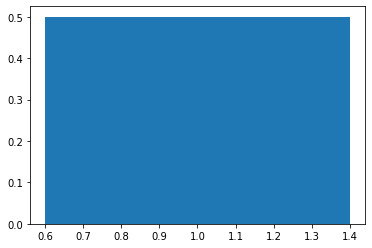

In [67]:
plt.bar(x=true_disaster,height=.5)

<BarContainer object of 9256 artists>

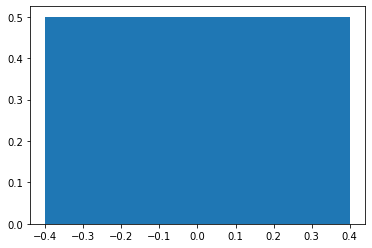

In [68]:
plt.bar(x=false_disaster,height=.5)

<AxesSubplot:xlabel='target', ylabel='count'>

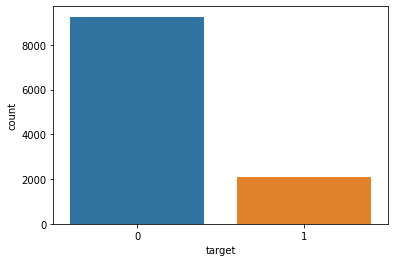

In [69]:
sns.countplot(x='target',data=df)

<AxesSubplot:xlabel='location', ylabel='count'>

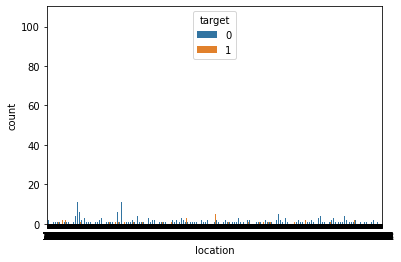

In [70]:
sns.countplot(x='location',hue='target',data=df)

In [71]:
df.head()

,id,keyword,location,text,target
0,0,0,2265,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,0,2265,Telangana: Section 144 has been imposed in Bha...,1
2,2,0,2265,Arsonist sets cars ablaze at dealership https:...,1
3,3,0,2104,Arsonist sets cars ablaze at dealership https:...,1
4,4,0,2389,"""Lord Jesus, your love brings freedom and pard...",0


In [73]:
df.drop(["id","keyword","location"],1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_12040\3619572657.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(["id","keyword","location"],1,inplace=True)


In [74]:
df.head()

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0


In [75]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

In [76]:
x=df['text']
y=df['target']

In [77]:
y=np.array(y)
y

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [84]:
tokenizer=Tokenizer(num_words=5000,lower=True)
tokenizer.fit_on_texts(x)
len(tokenizer.word_index)
dict_size=len(tokenizer.word_index)+1
print(dict_size)

30730


In [90]:
from keras_preprocessing.sequence import pad_sequences

In [91]:
encoded_sequence = tokenizer.texts_to_sequences(x)
final_input = pad_sequences(encoded_sequence,maxlen=200,padding='pre')

In [92]:
x[0]

'Communal violence in Bhainsa, Telangana. "Stones were pelted on Muslims\' houses and some houses and vehicles were set ablaze…'

In [93]:
encoded_sequence[0]

[4335,
 839,
 8,
 1699,
 1580,
 2380,
 69,
 4336,
 13,
 794,
 9,
 78,
 794,
 9,
 1424,
 69,
 277]

In [94]:
final_input[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [95]:
final_output=y

In [96]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Bidirectional,SpatialDropout1D,Dropout

In [98]:
dimension=32
model=Sequential()
model.add(Embedding(dict_size,dimension,input_length=200))
model.add(SpatialDropout1D(.25))
model.add(LSTM(50,dropout=.5,recurrent_dropout=.5,return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(120,return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(40))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])



In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           983360    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 200, 50)           16600     
                                                                 
 dropout (Dropout)           (None, 200, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 200, 120)          82080     
                                                                 
 dropout_1 (Dropout)         (None, 200, 120)          0         
                                                      

In [100]:
prediction=model.fit(final_input,final_output,epochs=7,batch_size=32)

Epoch 1/7
356/356 [==============================] - 160s 430ms/step - loss: 0.3746 - accuracy: 0.8515
Epoch 2/7
356/356 [==============================] - 151s 425ms/step - loss: 0.2538 - accuracy: 0.9100
Epoch 3/7
356/356 [==============================] - 152s 427ms/step - loss: 0.2128 - accuracy: 0.9245
Epoch 4/7
356/356 [==============================] - 162s 456ms/step - loss: 0.1847 - accuracy: 0.9319
Epoch 5/7
356/356 [==============================] - 150s 421ms/step - loss: 0.1667 - accuracy: 0.9382
Epoch 6/7
356/356 [==============================] - 153s 429ms/step - loss: 0.1495 - accuracy: 0.9467
Epoch 7/7
356/356 [==============================] - 151s 423ms/step - loss: 0.1399 - accuracy: 0.9498


In [101]:
model.save("Disaster Predictor.h5")

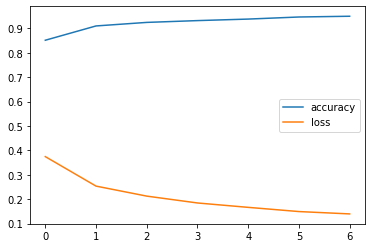

In [102]:
plt.plot(prediction.history['accuracy'],label='accuracy')
plt.plot(prediction.history['loss'],label='loss')
plt.legend(loc='best')
plt.show()

In [132]:
def predict_disaster(tweet):
    l = []
    l.append(tweet)
    sequence = tokenizer.texts_to_sequences(l)
    pad_seq = pad_sequences(sequence,maxlen=80,padding='pre')
    output = model.predict_classes(pad_seq)
    if int(output.round().item()) == 1:
        print("True,it's a true news after disaster")
    else:
        print("This is a False news")
      
    
      

In [134]:
predict_disaster("Communal violence in Bhainsa, Telangana.Stones were pelted on Muslims houses and some houses and vehicles were set ablaze…")

AttributeError: 'Sequential' object has no attribute 'predict_classes'